In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

In [10]:
df.head()

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93


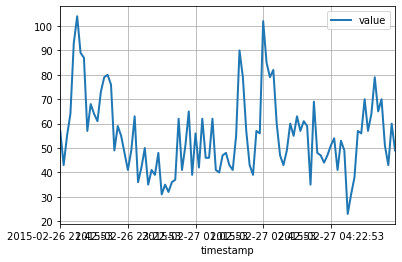

In [9]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [4]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [5]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 26844
100%|██████████| 50/50 [00:04<00:00, 11.09it/s, avg_epoch_loss=4.43]
INFO:root:Epoch[0] Elapsed time 4.523 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.425738
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.27it/s, avg_epoch_loss=4.1]
INFO:root:Epoch[1] Elapsed time 4.437 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.097099
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.42it/s, avg_epoch_loss=4.06]
INFO:root:Epoch[2] Elapsed time 4.384 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.057565
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.95it/s, avg_epoch_loss=4.02]
INFO:root:Epoch[3] Elapsed time 4.186 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.022463
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.70it/s, avg_epoch_loss=3.98]
INFO:

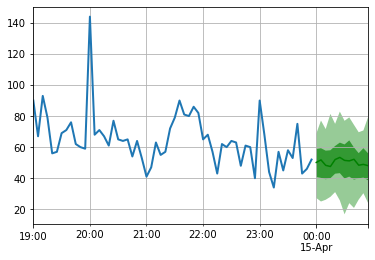

In [6]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')